# Exploratory Data Analysis of Data Pulled from TMDB API

## Load and Import Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, json
import glob
from sqlalchemy import create_engine
pd.set_option('display.max_columns',50)

## Load TMDB files

In [2]:
# Use glob to get all file paths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/tmdb_api_results*.csv.gz"))
tmdb_files

['Data/tmdb_api_results_2001.csv.gz', 'Data/tmdb_api_results_2002.csv.gz']

In [3]:
# Adding line terminator arg to get around error
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in tmdb_files] )

## EDA

In [5]:
# Drop duplicates
df = df.drop_duplicates()
len(df)

2676

In [6]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2664
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2676 non-null   bool   
 1   backdrop_path          1572 non-null   object 
 2   belongs_to_collection  221 non-null    object 
 3   budget                 2676 non-null   int64  
 4   genres                 2676 non-null   object 
 5   homepage               216 non-null    object 
 6   id                     2676 non-null   int64  
 7   imdb_id                2676 non-null   object 
 8   original_language      2676 non-null   object 
 9   original_title         2676 non-null   object 
 10  overview               2620 non-null   object 
 11  popularity             2676 non-null   float64
 12  poster_path            2449 non-null   object 
 13  production_companies   2676 non-null   object 
 14  production_countries   2676 non-null   object 
 15  rele

- ***1) How many movies had at least some valid financial information (values > 0 for budget OR revenue)?***

In [7]:
# Count the number of unique movies (entries) with non-zero revenue or budget
filter = (df['revenue'] > 0) | (df['budget'] > 0)
len(df[filter].drop_duplicates(subset = ['original_title']))

758

- There 758 unique movies (entries) with valid financial information.

- ***2) How many movies are there in each of the certification categories (G/PG/PG-13/R)?***

In [8]:
# Remove duplicate entries
df_2 = df.drop_duplicates(subset = ['original_title']).copy()

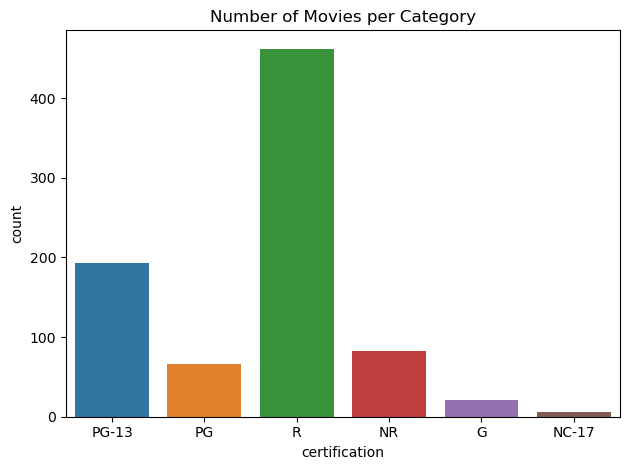

In [10]:
# Create figure with appropriate
fig, ax1 = plt.subplots();

# Plot a count plot
sns.countplot(data=df_2, x='certification', ax=ax1);

# Add a title with the feature name included
ax1.set_title('Number of Movies per Category');

# Tighten layout
fig.tight_layout();

- ***3) What is the average revenue per certification category?***

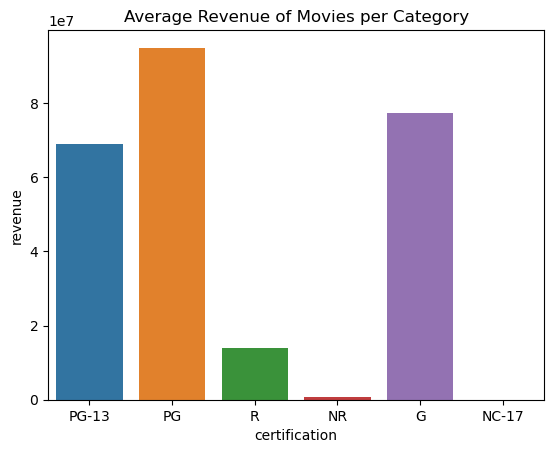

In [14]:
# Create figure with appropriate
fig2, ax2 = plt.subplots();

# Plot a count plot
sns.barplot(data=df_2, x='certification', y='revenue', ax=ax2, errorbar = None, estimator = 'mean');

# Add a title with the feature name included
ax2.set_title('Average Revenue of Movies per Category');

# Tighten layout
fig.tight_layout();

- ***4) What is the average budget per certification category?***

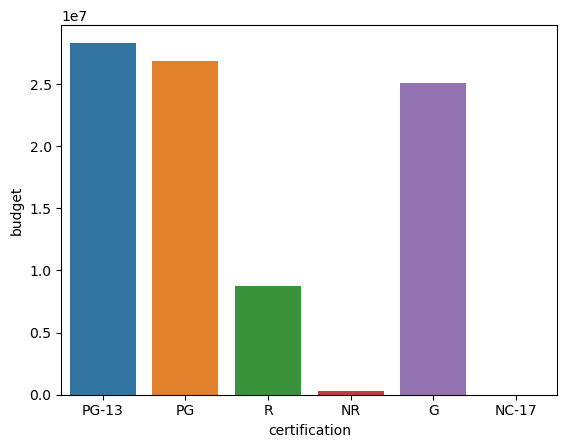

In [15]:
# Create figure with appropriate
fig3, ax3 = plt.subplots();

# Plot a count plot
sns.barplot(data=df_2, x='certification', y='budget', ax=ax3, errorbar = None, estimator = 'mean');

# Add a title with the feature name included
ax2.set_title('Average Budget of Movies per Category');

# Tighten layout
fig.tight_layout();

- ***SUMMARY***
- Rated 'R' movies were the most common ones during the year 2001 and 2002
- Movies with 'PG' category have the highest average revenue during the said period
- Movies with 'PG-13' category spends the most during the said period